# Rxday - models + obs

extremes for individual gridboxes (rx1day, rx5day) for time period, averaged over the domain \
rx1day - maximum daily precipitation rate for each gridbox over a time period (1 year) \
rx5day - maximum 5 day rolling average precipitation rate for each gridbox over a time period (1 year)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

from metric_plotFuncs import *

In [2]:
models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',       # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    # ''
    ]
model = models[0]

observations = [
    'GPCP'
    # ''
    ]
obs = observations[0]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]   

variable_options = [
    'rx1day',
    # 'rx5day'
    ]
variable_option = variable_options[0]


if model:
    var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_pr_rxday_' + experiment + '.nc')[variable_option]
    aWeights = np.cos(np.deg2rad(var.lat))
    var.attrs['units']= 'mm/day'

if obs:
    var_obs = xr.open_dataset(home + '/Documents/data/obs/GPCP' + '/' + obs + '_pr_rxday.nc')[variable_option]
    var_obs.attrs['units']= 'mm/day'
    aWeights = np.cos(np.deg2rad(var_obs.lat))

## example of rxday precipitaiton extremes

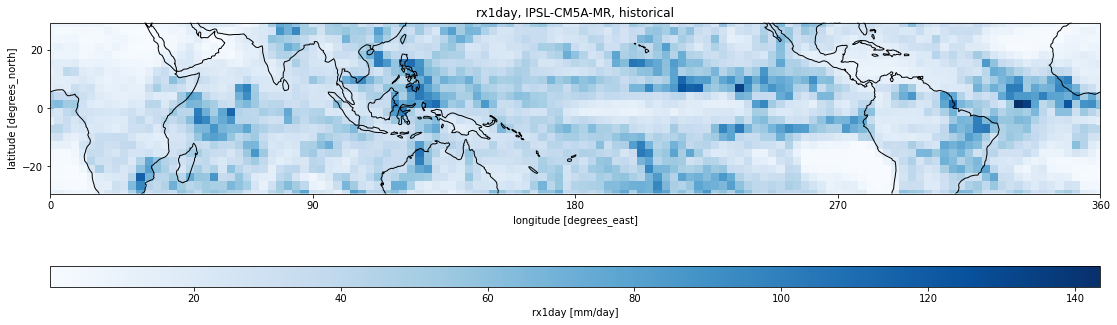

In [13]:
year = 0
scene = var.isel(time=year)
cmap = 'Blues'
title = variable_option + ', ' + model + ', ' + experiment

plot_scene(scene, cmap, title, vmin=None, vmax=None,fig_width=20 ,fig_height=10)

## one model / obs

### spatial mean

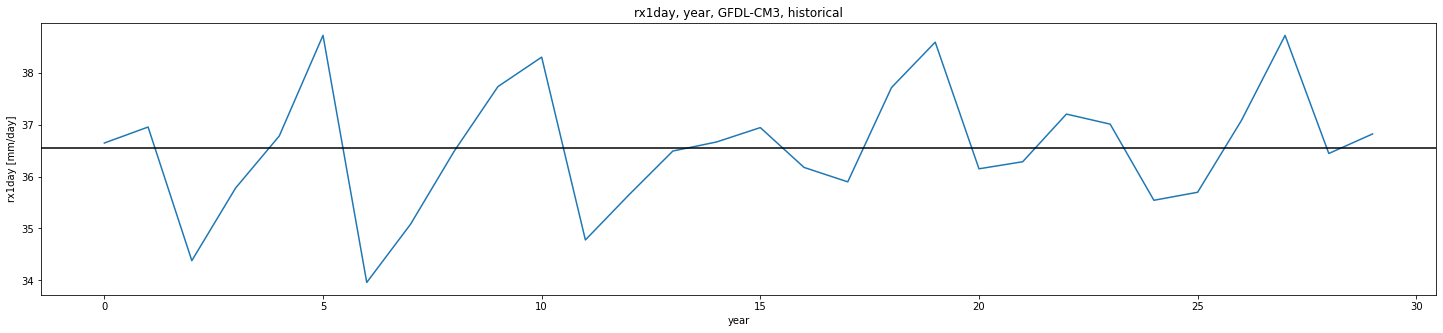

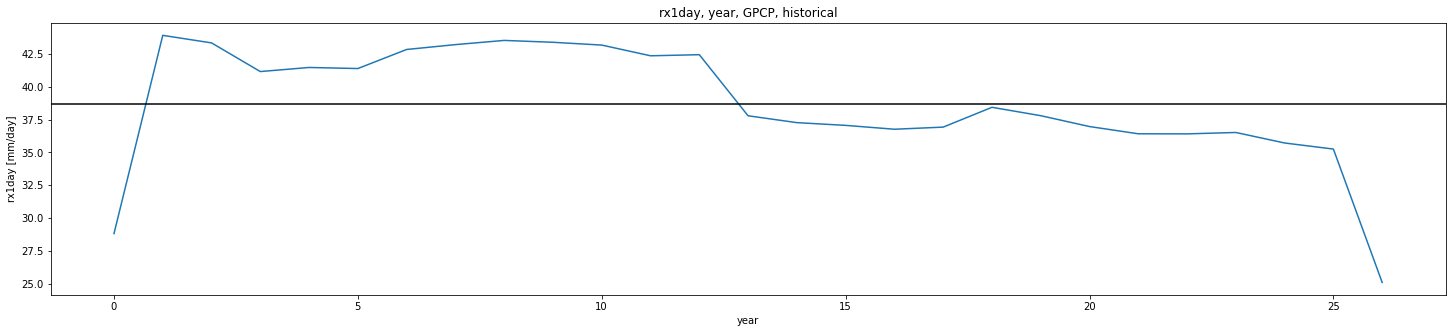

In [4]:
timeMean_options = [
    'year'
    ]
timeMean_option = timeMean_options[0]

if model:
    title = variable_option + ', '+ timeMean_option + ', ' + model + ', ' + experiment

    if timeMean_option == 'year':
        y = var.weighted(np.cos(np.deg2rad(var.lat))).mean(dim=('lat','lon'), keep_attrs=True)

        plot_timeseries(y, variable_option, timeMean_option, title)
        
if obs:
    title = variable_option + ', '+ timeMean_option + ', ' + obs + ', ' + experiment

    if timeMean_option == 'year':
        y = var_obs.weighted(np.cos(np.deg2rad(var_obs.lat))).mean(dim=('lat','lon'), keep_attrs=True)

        plot_timeseries(y, variable_option, timeMean_option, title)

## models together / obs

In [5]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',      # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    # ''
    ]
model = models[0]

### time mean

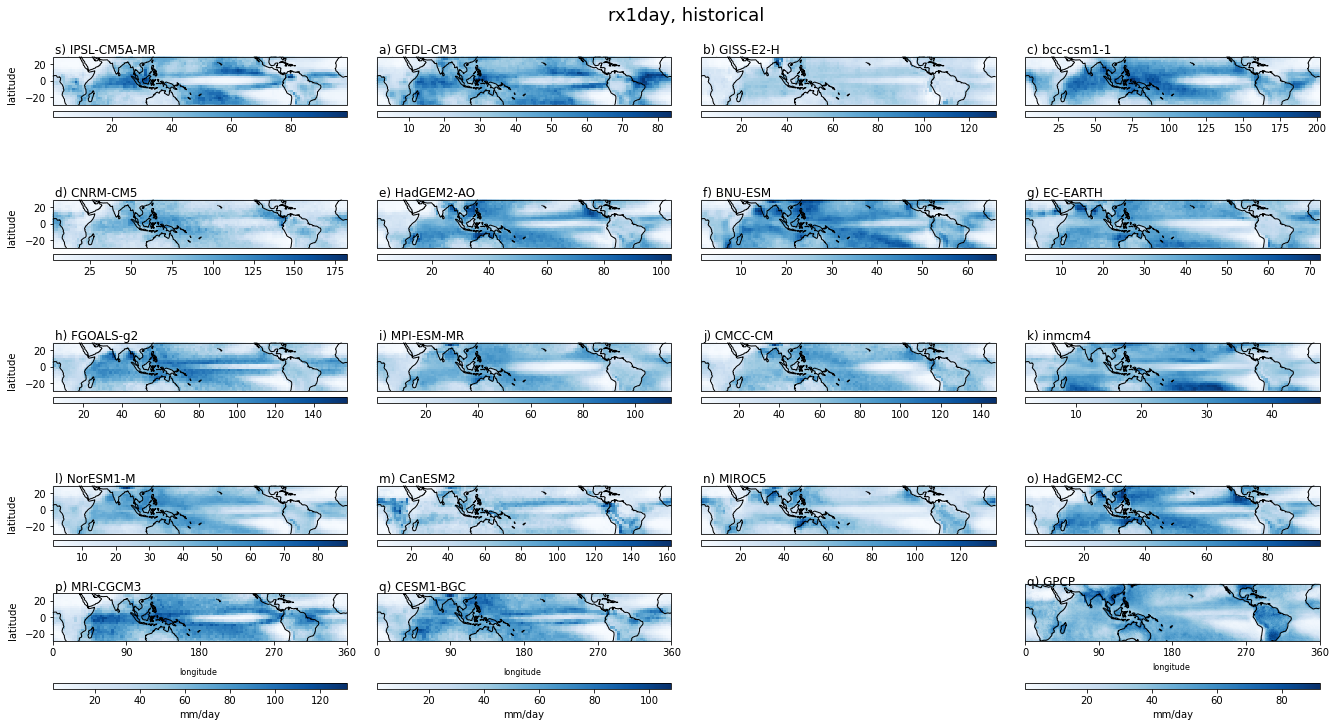

In [15]:
variable_file = 'pr_rxday'
scene_types = [
    'experiment',
    # 'diff',
    # 'diff_tas'
]
scene_type = scene_types[0]

title = variable_option + ', ' + experiment
vmin = None
vmax = None

plot_scenes_tog(home, models, obs, experiment, 
                    scene_type, variable_file, 
                    variable_option, title,
                    vmin=None, vmax=None)


### spatial mean

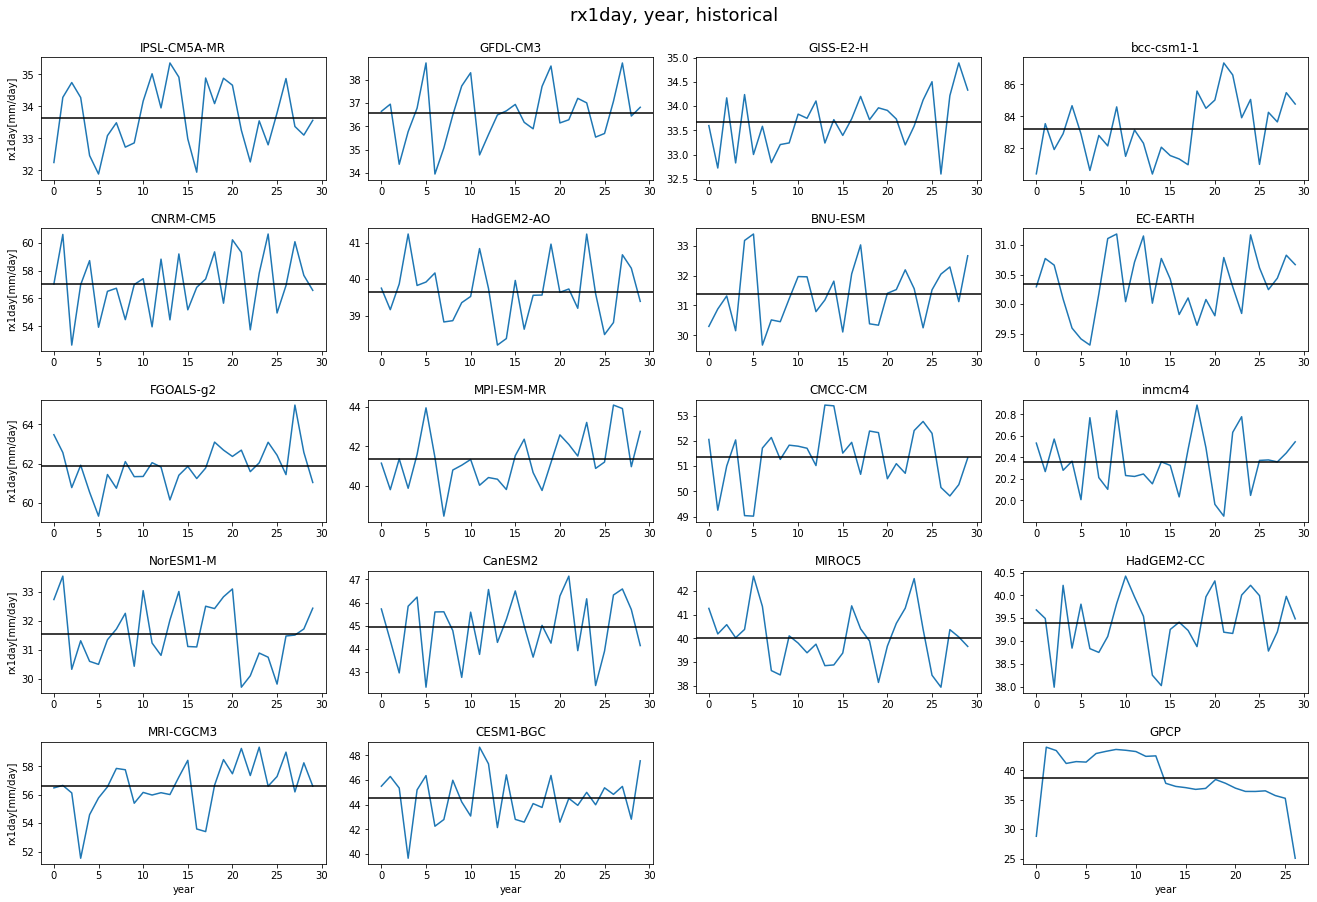

In [ ]:
timeMean_options = [
    'year'
    ]
timeMean_option = timeMean_options[0]

variable_file = 'pr_rxday'
title = variable_option + ', '+ timeMean_option + ', ' + experiment
vmin = None
vmax = None

plot_timeseries_tog(models, obs, home, experiment, 
                    variable_file, variable_option, 
                    timeMean_option, title)

### time mean and spatial mean

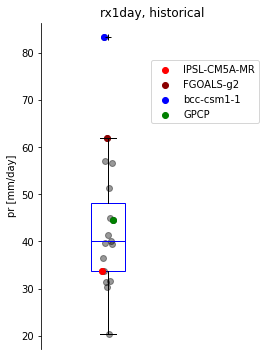

In [ ]:
variable_file = 'pr_rxday'
box_types = [
    'experiment',
    # 'diff',
    # 'diff_tas'
]
box_type = box_types[0]

if box_type == 'experiment':
    title = variable_option + ', ' + experiment
    text_ylabel = 'pr [mm/day]'

if box_type == 'diff':
    title = 'Difference in ' + variable_option
    text_ylabel = 'pr [mm/day]'

if box_type == 'diff_tas':    
    title = 'Difference in ' + variable_option + '/K'
    text_ylabel = 'pr [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']'

boxplotColor(home, models, variable_file, variable_option, box_type, experiment, obs, title, text_ylabel)